In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth =None
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('used_c.csv')

In [3]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


OBSERVATION LEVEL 1:<BR>
    
WE HAVE GOT TOTAL 10 FEATURES AND A TARGET <BR>
TARGET-PRICE<BR>

In [4]:
df.shape

(2318, 11)

CHECKING FOR THE DULPLICATE ROWS

In [5]:
df.duplicated().sum()

0

NO DUPLICATED ROWS FOUND

checking the data types of all the features

In [6]:
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

OBSERVATION LEVEL 2 <BR>
    OUR TARGET IS A INTEGER
    DATASET DATATYPES ARE MIXED AND CONTAINS INT AND OBJECT DATATYPES
    

CHECKING FOR THE NULLS

In [7]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


AS IT CAN BE CLEARLY OBSERVED THAT THERE ARE NO NULLS PRESENT AND OUR DATASET IS HEALTHY IS TERMS OF NULL


In [9]:
df.shape

(2318, 11)

MAKING A LIST OF ALL CATEGORICAL COLUMNS and naming it as LIS

In [10]:
lis=df[['mark','model','transmission','drive','hand_drive','fuel']]

MAKING A DATAFRAME CONSISTING OF <BR>
    1).COLUMN NAME<BR>
    2).NUMBER OF UNIQUE FEATURES<BR>
    3).UNIQUE FEATURES<BR>
    

<br>
<br>
<br>
<br>
INITIALISING THE LISTS FOR THE ABOVE FEATURES TO BE APPENDED

In [11]:
col_name=[]
num=[]
feat=[]


In [12]:
for i in lis:
    col_name.append(i)
    num.append(len(df[i].unique()))
    feat.append(df[i].unique())

In [13]:
inf=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})

In [14]:
inf

,FEATURE,NUMBER OF UNIQUE FEATURES,UNIQUE FEATURES
0,mark,28,"[nissan, toyota, daihatsu, volkswagen, mazda, honda, subaru, mercedes-benz, kubota, mitsubishi, suzuki, bmw, chrysler, smart, gm, opel, isuzu, land rover, peugeot, hyundai, kia motors, audi, citroen, mitsuoka, volvo, ford, hino, jaguar]"
1,model,258,"[march, lafesta, avensis, mira, passat, bongo van, step wgn, sambar, inspire, mercedes-benz others, note, passo, impreza, kubota others, life, progres, cube cubic, cube, a-class, coltplus, mr wagon, pajero mini, fit, legacy b4, vitz, mark ii blit, insight, move, tanto, terios kid, az-wagon, coo, verisa, swift, delica d2, tiida, sienta, mini, colt, platz, bluebird sylphy, eclipse, bb, moco, clipper truck, esse, ek wagon, polo, x-trail, atenza sport, ad van, pixis space, freed spike, stream, alto, raum, wish, every, demio, jimny, premacy, cr-v, lapin, delica, wagon r, lancer, naked, odyssey, ractis, porte, corolla rumion, tiida latio, voxy, carol, sunny, bongo truck, boon, s-mx, pt cruiser, golf, ad expert, fit hybrid, serena, edix, move custom, impreza anesis, estima, carry truck, solio, mpv, vanette van, accord, tribute, pajero io, noah, vanette truck, delica truck, lancer cargo, atenza wagon, atenza, ...]"
2,transmission,3,"[at, mt, cvt]"
3,drive,3,"[2wd, 4wd, awd]"
4,hand_drive,3,"[rhd, center, lhd]"
5,fuel,5,"[gasoline, diesel, hybrid, lpg, cng]"


AS WE CAN SEE THIS DATAFRAME GIVES AN IDEA ABOUT EACH CATEGORICAL COLUMNS PRESENT AND THE UNIQUE FEATURES THEY HAVE IN THEM

DECRIBING THE DATASET

In [15]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


ENGINE CAPACITY IS HAVING A EXCEPTIONAL MININMUM AND MAXIMUMS VALUE <BR>
    MILEAGE SEEMS TO HAVE A LOT OF OUTLIERS AS MAXIMUM VALUE IS TOO MUCH LARGER THAN THE 75% VALUES<BR>
    WILL USE OULIERS REMOVAL IN LATER STAGES

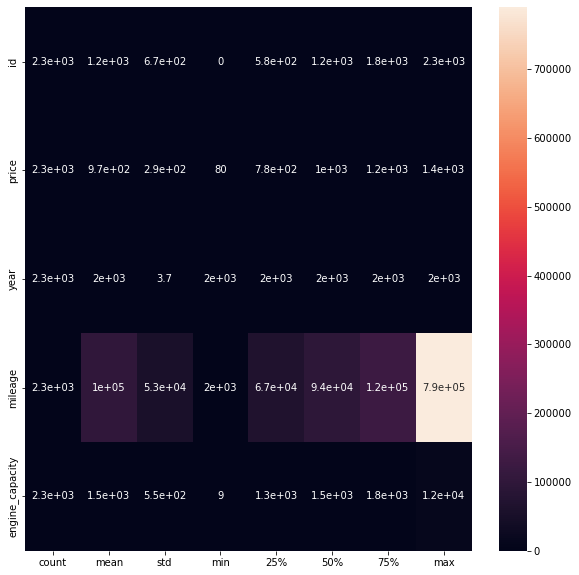

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.describe().T,annot=True,annot_kws={'size':10})
plt.show()

 A COMPLETE DESCRIPTION OF THE CONTINUOUS DATA IS AS ABOVE

CHECKING FOR THE CORRELATION OF THE CONTINUOUS FEATURES WITH THE TARGET(PRICE)

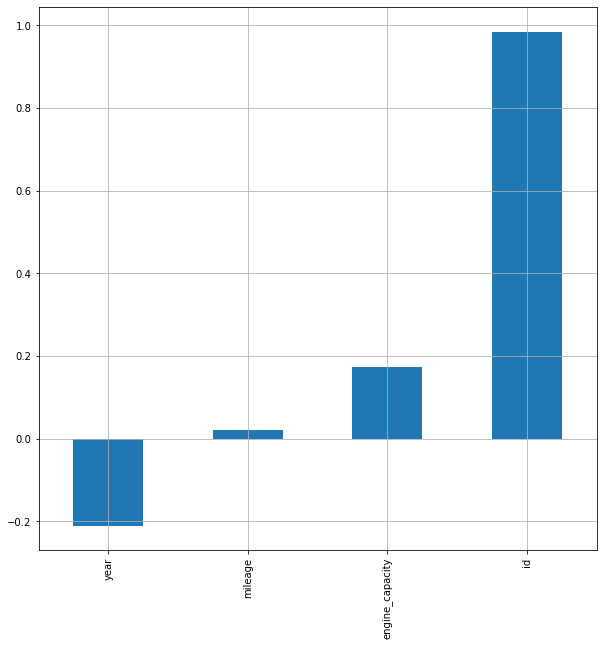

In [19]:
plt.figure(figsize=(10,10))
df.corr()['price'].drop(['price']).sort_values().plot(kind='bar',grid=True)
plt.show()

as we can see there is a high correlation of  ID  WITH THE PRICE<BR>
    ENGINE CAPACITY HAVE A CONSIDERABLE POSITIVE CORRELATION WITH THE PRICE<BR>
    YEAR HAVE A SIGNIFICANT NEGATIVE CORRERLATION WITH THE PRICE <BR>
    ENGINE CAPACITY INCREASES-PRICE INCREASES<BR>
    YEAR PASSES BY -PRICE DECREASES DUE TO INFLATION AND CAR BEING A DEPPRECIATING ASSET ITS PRICE IS GOING TO COME DOWN EACH YEAR PASSING BY


In [20]:
print(df.corr()['price'].drop(['price']).sort_values())

year              -0.211092
mileage            0.021581
engine_capacity    0.173748
id                 0.985100
Name: price, dtype: float64


CHEKING FOR THE CORRELATION AMONG THE FEATURES AND FEATURE WITH THE TARGET(PRICE) USING A HEATMAP

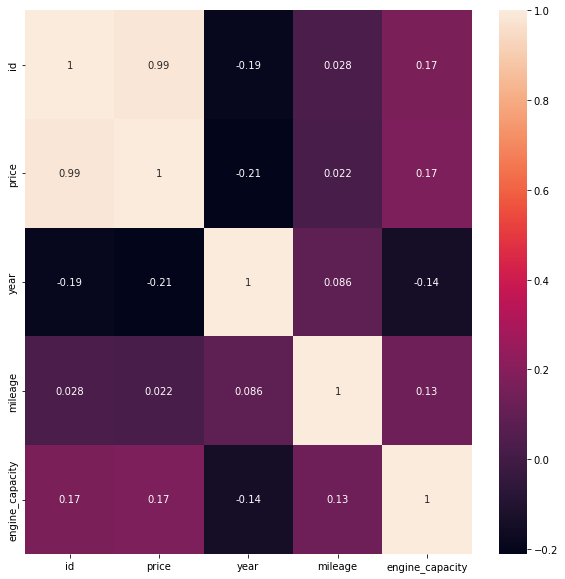

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

PLOTTING THE RELATIONSHIP BETWEEN THE FEATURES AND TARGET

In [22]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

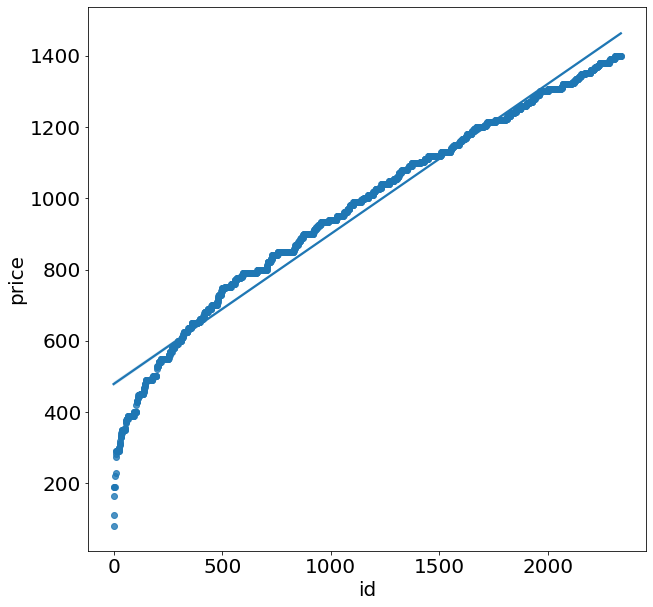

In [28]:
plt.figure(figsize=(10,10))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('ID',fontsize=20)
plt.ylabel('PRICE',fontsize=20)
sns.regplot(x=df['id'],y=df['price'])
plt.show()

A STRONG CORRELATION EXIST BETWEEN ID AND PRICE

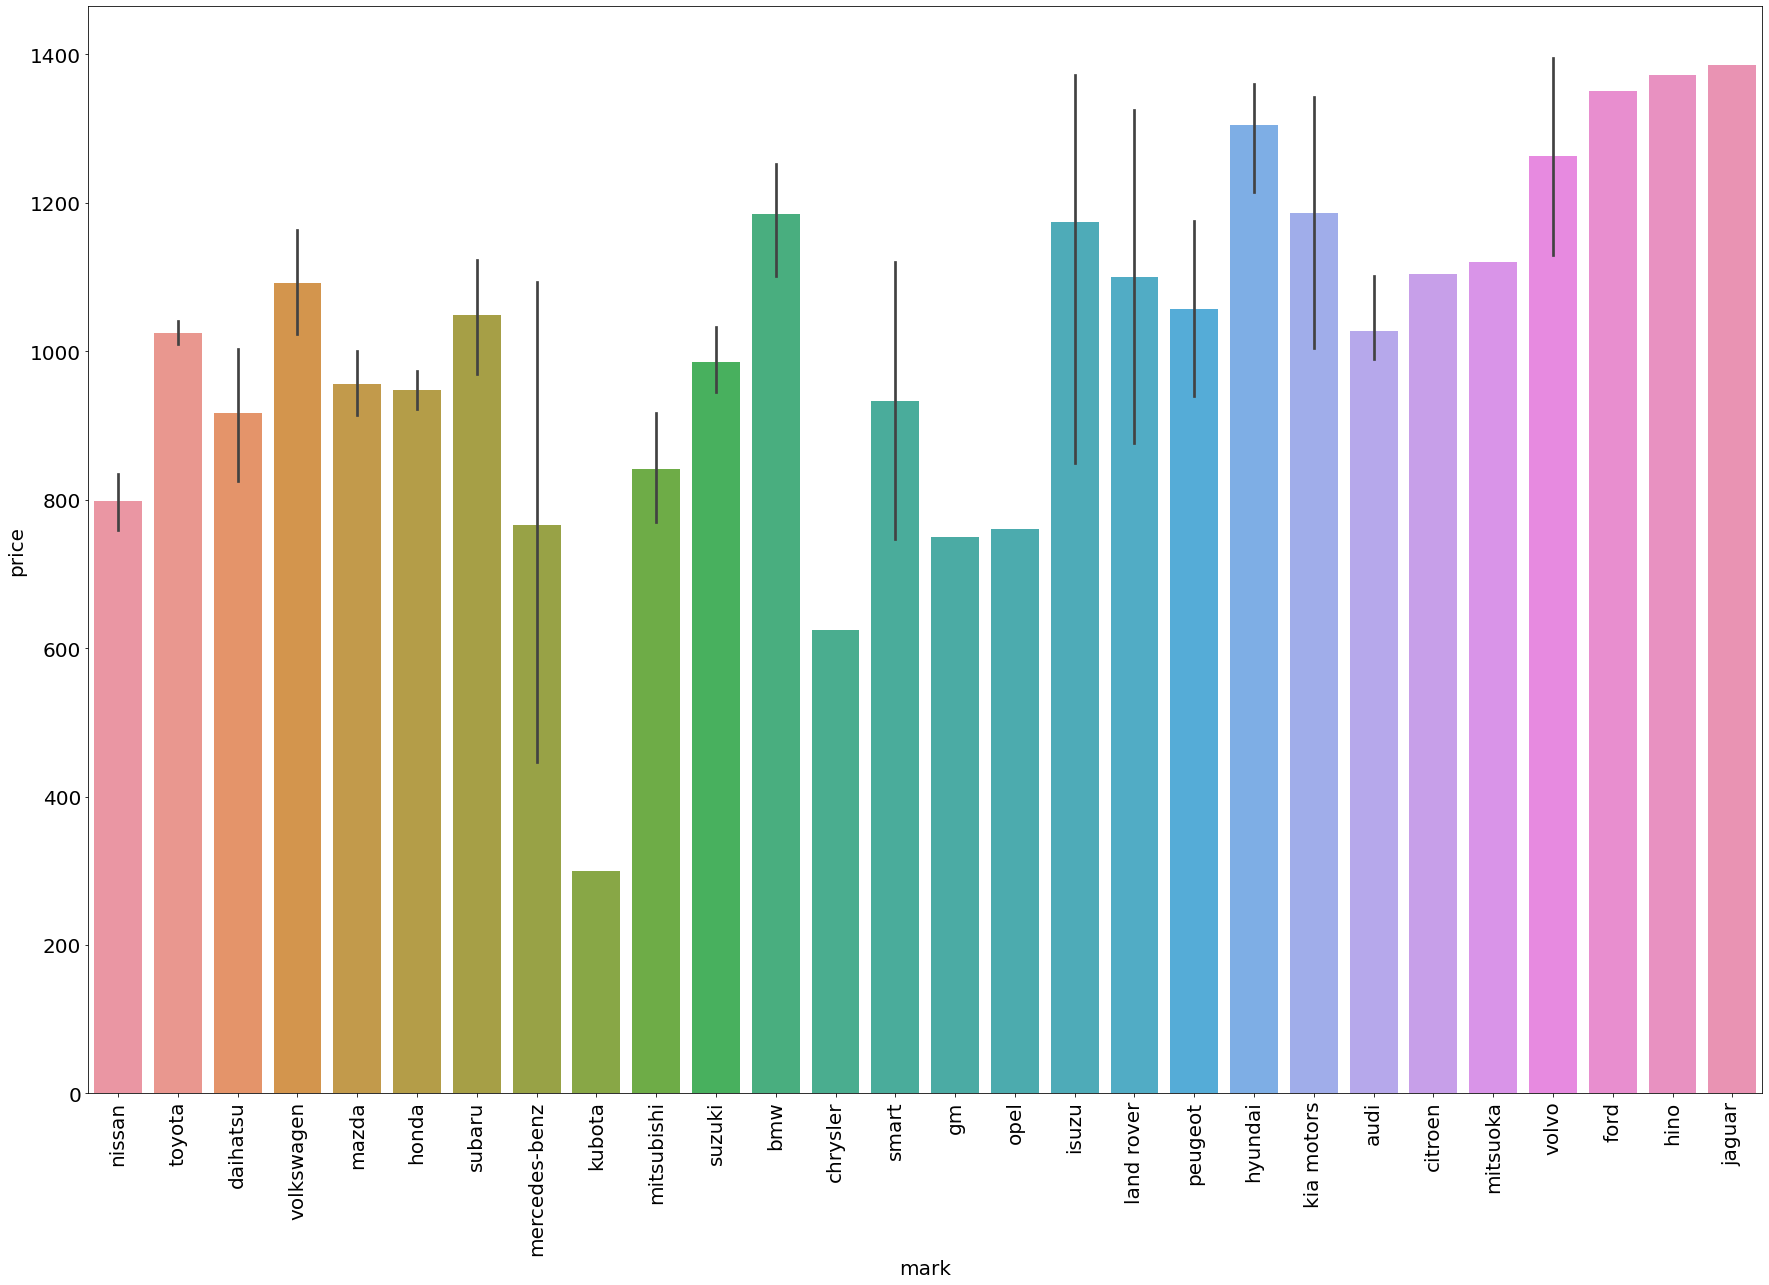

In [29]:
plt.figure(figsize=(30,20))
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.xlabel('MARK',fontsize=20)
plt.ylabel('PRICE',fontsize=20)
sns.barplot(x=df['mark'],y=df['price'])
plt.show()

JAGUAR USED CARS HAVE THE HIGHEST PRICE<BR>
KUBOTA USED CARS HAVE THE LEAST PRICE <BR>

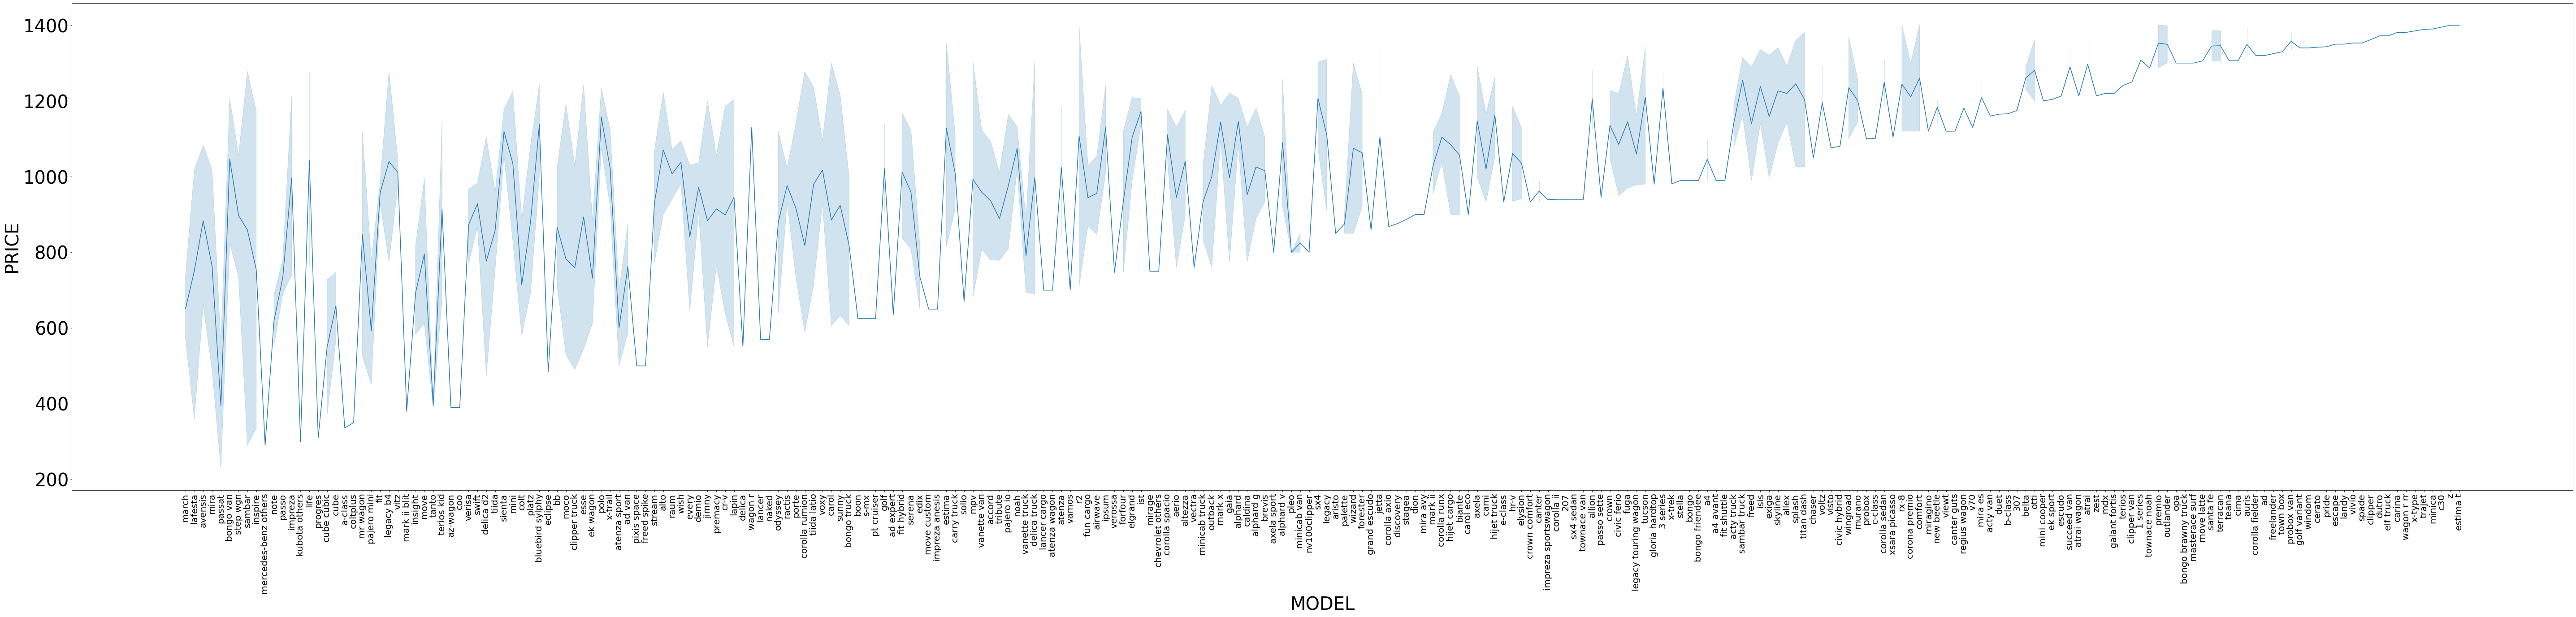

In [30]:
plt.figure(figsize=(100,20))
plt.xticks(size=20,rotation=90)
plt.yticks(size=40)
plt.xlabel('MODEL',fontsize=40)
plt.ylabel('PRICE',fontsize=40)
sns.lineplot(x=df['model'],y=df['price'])
plt.show()

LINE PLOT DESCRIBING THE RELATIONSHIP BETWEEN MODEL AND PRICE

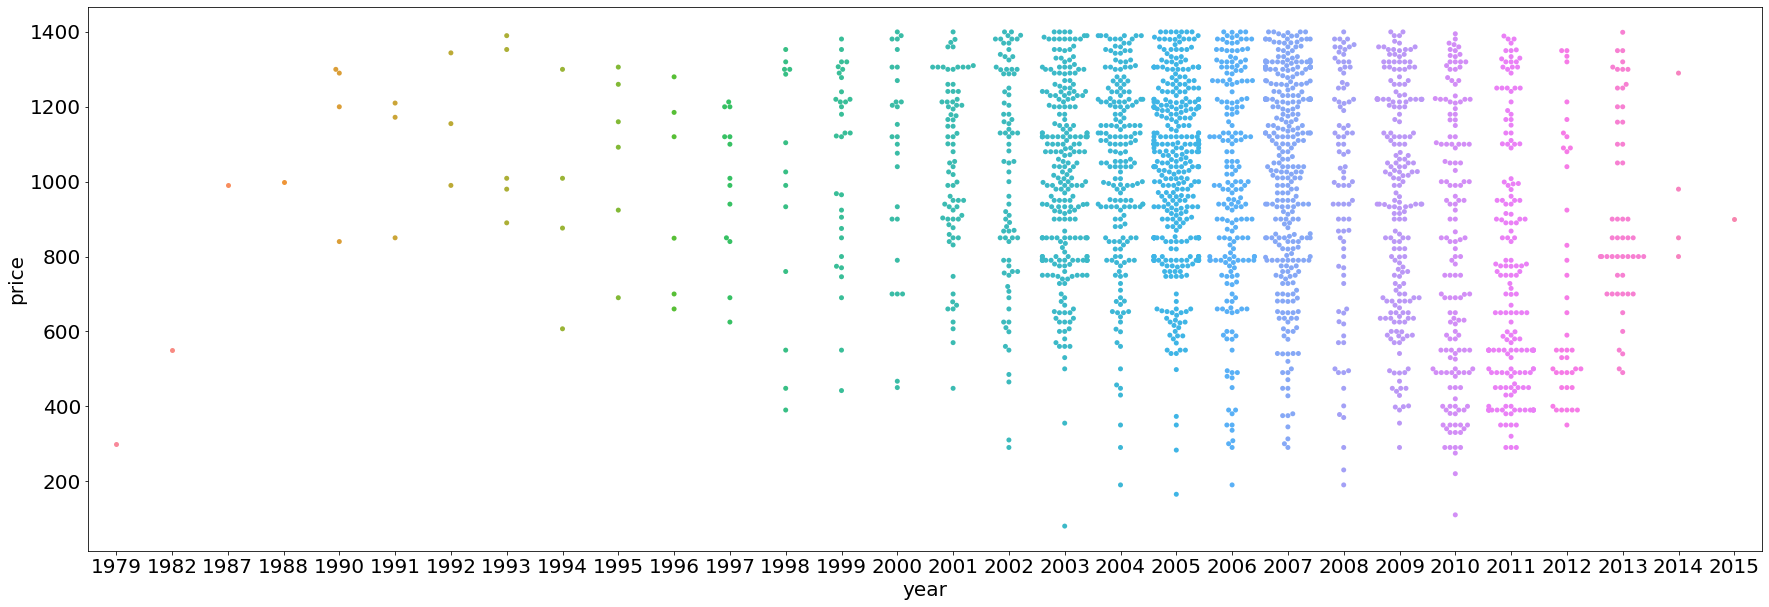

In [31]:
plt.figure(figsize=(30,10))
plt.xlabel('YEAR',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
sns.swarmplot(x=df['year'],y=df['price'])
plt.show()

ITS OBSERVED THAT AS YEAR PASSES BY FROM 2003 TO 2014 THERE IS A SHIFT IN DENSITY FROM HIGHER PRICE TO LOWER PRICES IT CAN BE INFERRED THAT THERE IS A DECREASE IN PRICE<BR>
    <BR>
        <BR>
            NO CLEAR TREND CAN BE OBSERVED FROM 1979 TO 1999

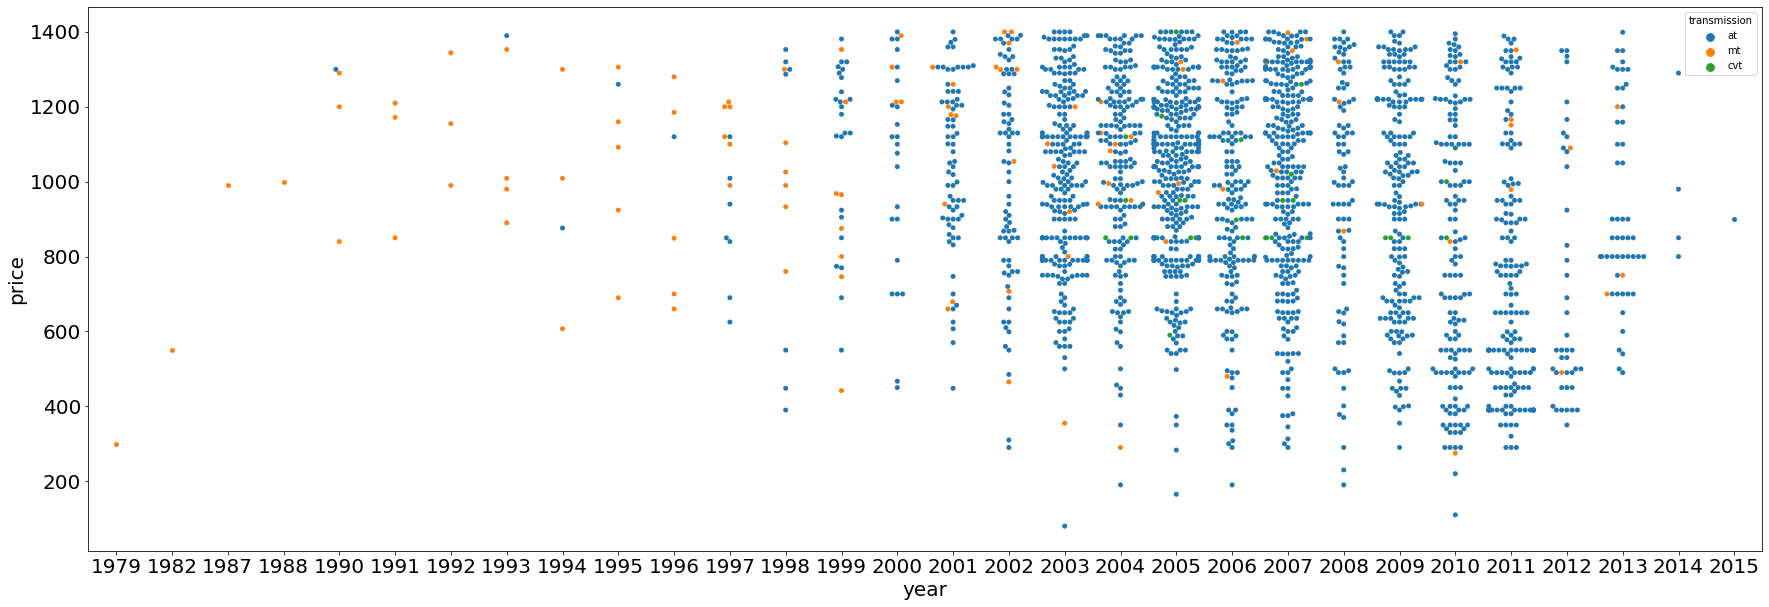

In [32]:
plt.figure(figsize=(30,10))
plt.xlabel('YEAR',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
sns.swarmplot(x=df['year'],y=df['price'],hue=df['transmission'])
plt.show()

ITS CAN BE OBSERVED THAT BEFORE 1998 MANUAL TRANSIMIISON HAD A GRAB OVER THE MARKET BUT AS THE TECHNOLOGY ADVANCED MORE AUTOMAKERS STARTED SHIFTING TO AUTOMATIC TRANSMISSION AND PRICES WERE ALSO HIGH FOR AUTMOMATIC TRANSMISSION AS COMAPARED TO MANUAL TRANSMISIION<BR>
    AND THERE IS SIGNIFICANT DECRESE IN PRICES OF AUTOMATIC TRANSMISSION OVER THE YEARS

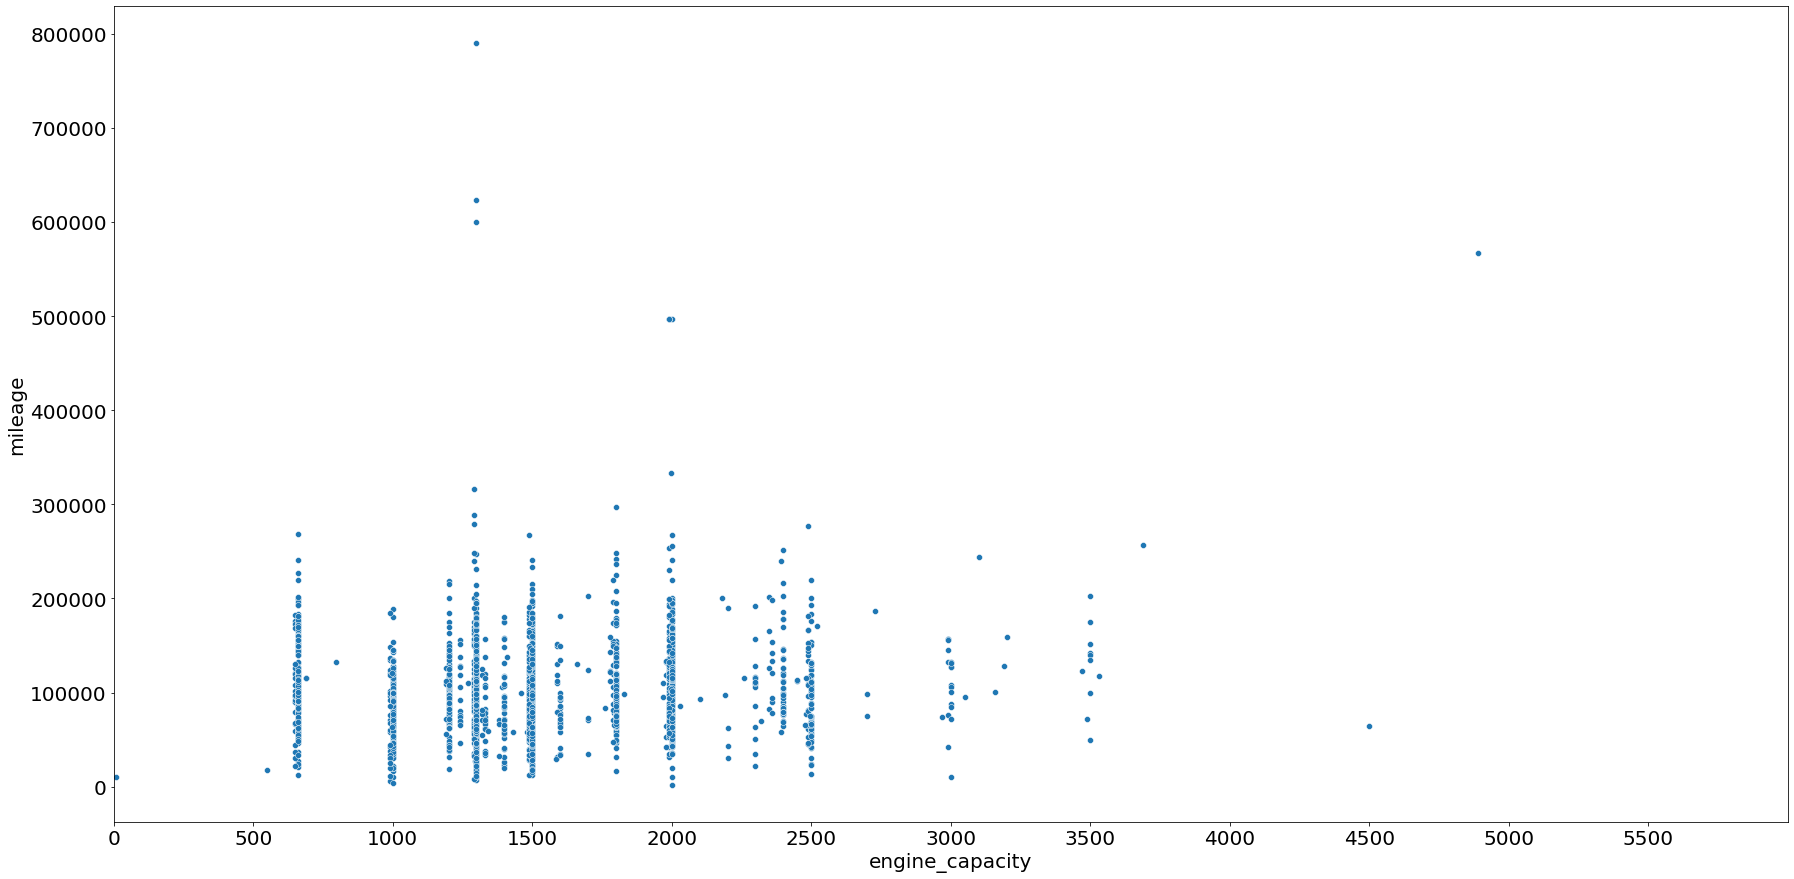

In [33]:
plt.figure(figsize=(30,15))
plt.xlabel('engine_capacity',fontsize=20)
plt.ylabel('mileage',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
sns.scatterplot(x=df['engine_capacity'],y=df['mileage'])
plt.xticks(np.arange(0,6000,500))
plt.xlim(0,6000)
plt.show()

AS ENGINE CAPACITY IT CAN BE SEEN THAT MILEGAGE IS SHOWING A SMALL DROP AS SCATTERPLOT IS BECOMING LESS DENSE

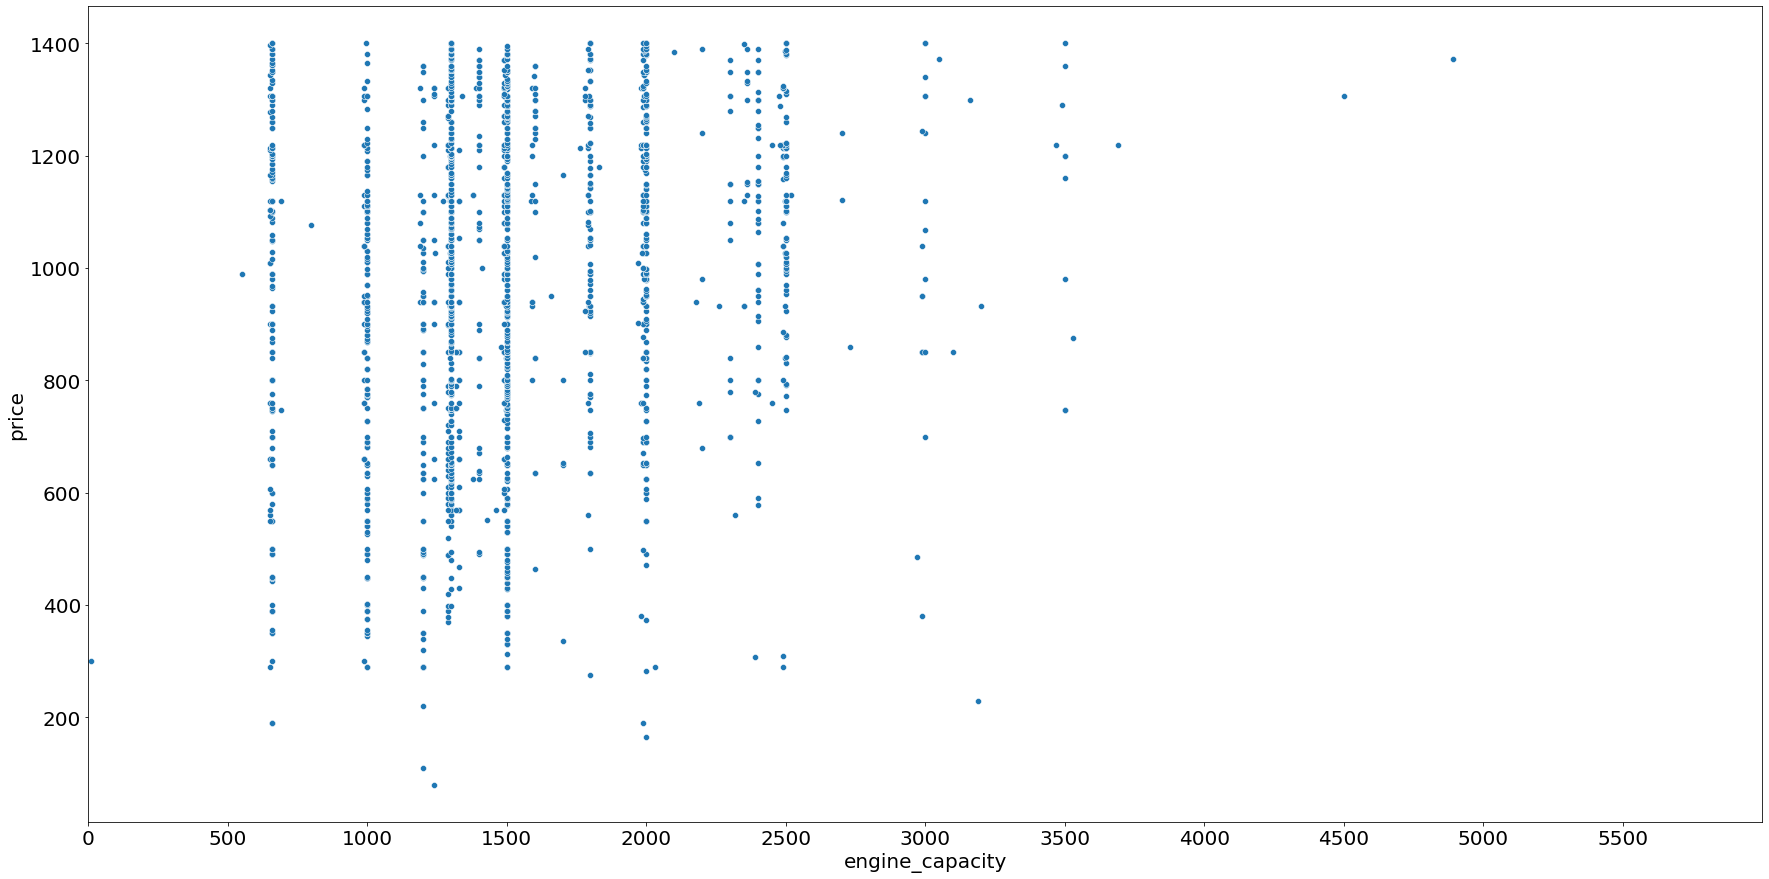

In [35]:
plt.figure(figsize=(30,15))
sns.scatterplot(x=df['engine_capacity'],y=df['price'])
plt.xlabel('engine_capacity',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0,6000,500))
plt.xlim(0,6000)
plt.show()

AS THE ENGINE CAPACITY INCREASES THERE IS A DECRESE IN THE PRICE RANGE AS IT CAN BE CLEARLY DEPICTED BY THE ABOBE SCATTERPLOT

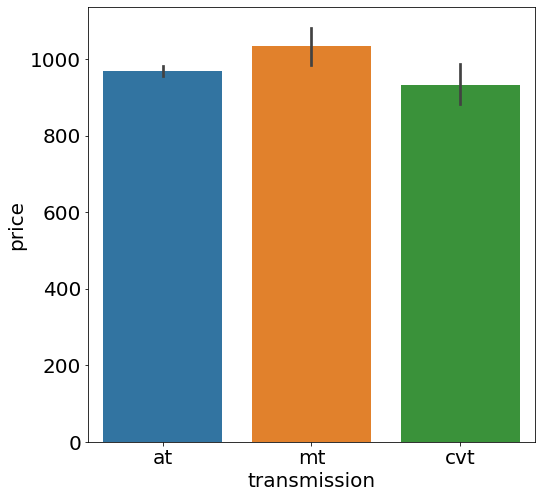

In [36]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['transmission'],y=df['price'])
plt.xlabel('transmission',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

MANUAL TRANSMIISON WERE SOUGHT TO HAVE HIHER PRICES AS COMAPRED TO AUTOMATIC AND CVT TRANSMIISON<br>
MANUAL TRANSMIISON CARS HIGH DEMAND MAY HAVE INREASED THE PRICES AS THEIR SERVIVING CHARGES ARE LOW AND MILEAGE IS GOOD AS COMAPRED TO AUTOMATIC TRANSMISSION<BR> 

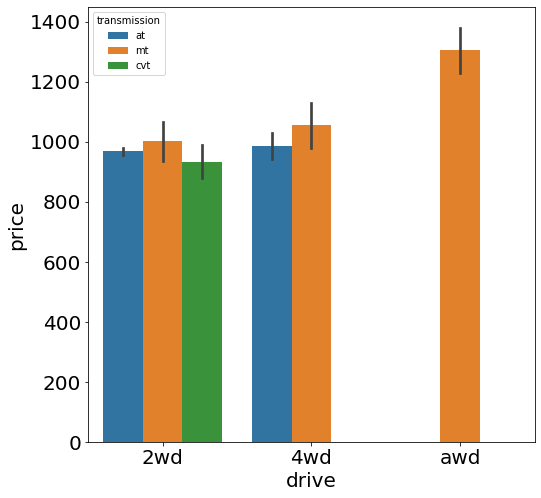

In [37]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['drive'],y=df['price'],hue=df['transmission'])
plt.xlabel('drive',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

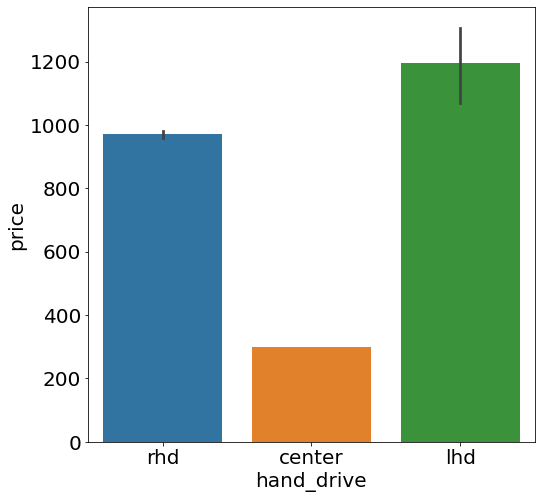

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['hand_drive'],y=df['price'])
plt.xlabel('hand_drive',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

HIGH PRICES ARE OBSERVED IN CASE OF LHD<BR>
LITTLE DIFFERENCE BETWEEN LHD AND RHD<BR>
AND CENTER IS HAVING THE LEAST PRICE THIS MAYBE BECAUSE LOW DEMAND AS PEOPLE MOSTLY PREFER A RHD OR LHD

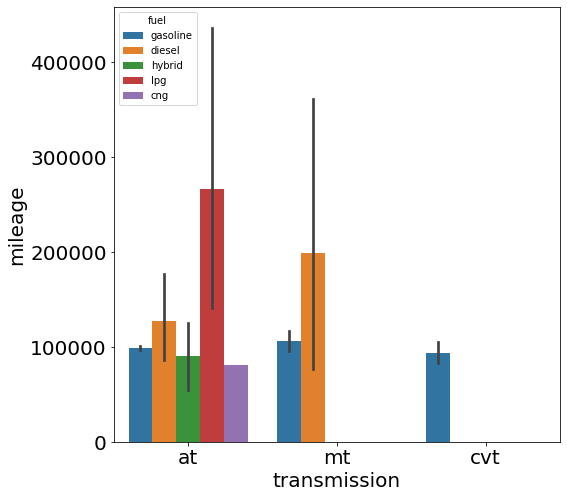

In [39]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['transmission'],y=df['mileage'],hue=df['fuel'])
plt.xlabel('transmission',fontsize=20)
plt.ylabel('mileage',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

manual transmission showed high mileage as compared to automatic and continuosly variable transmission<br>
lpg is giving the highest mileage<br>
diesel is following lpg and stands at number 2 <br>

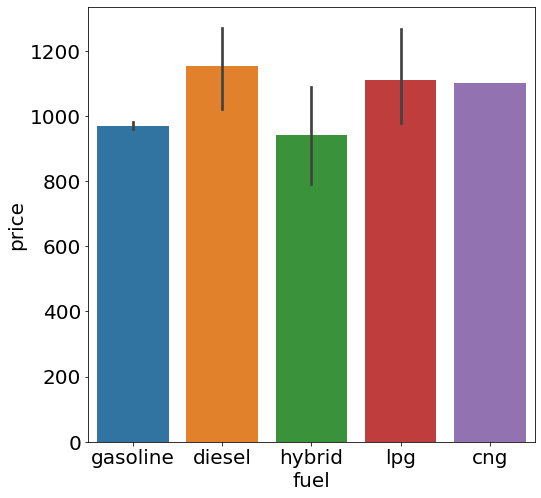

In [40]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['fuel'],y=df['price'])
plt.xlabel('fuel',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

DIESEL USED CARS HAVE THE HIHEST RESALE PRICE<BR>
HYBRID CARS HAVE THE LOWEST PRICE<BR>

In [41]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


CHECKING THE DISTRIBUTION OF PLOT FOR THE CONTINUOS COLUMNS

In [45]:
cn=df[['id','price','year','mileage','engine_capacity']]

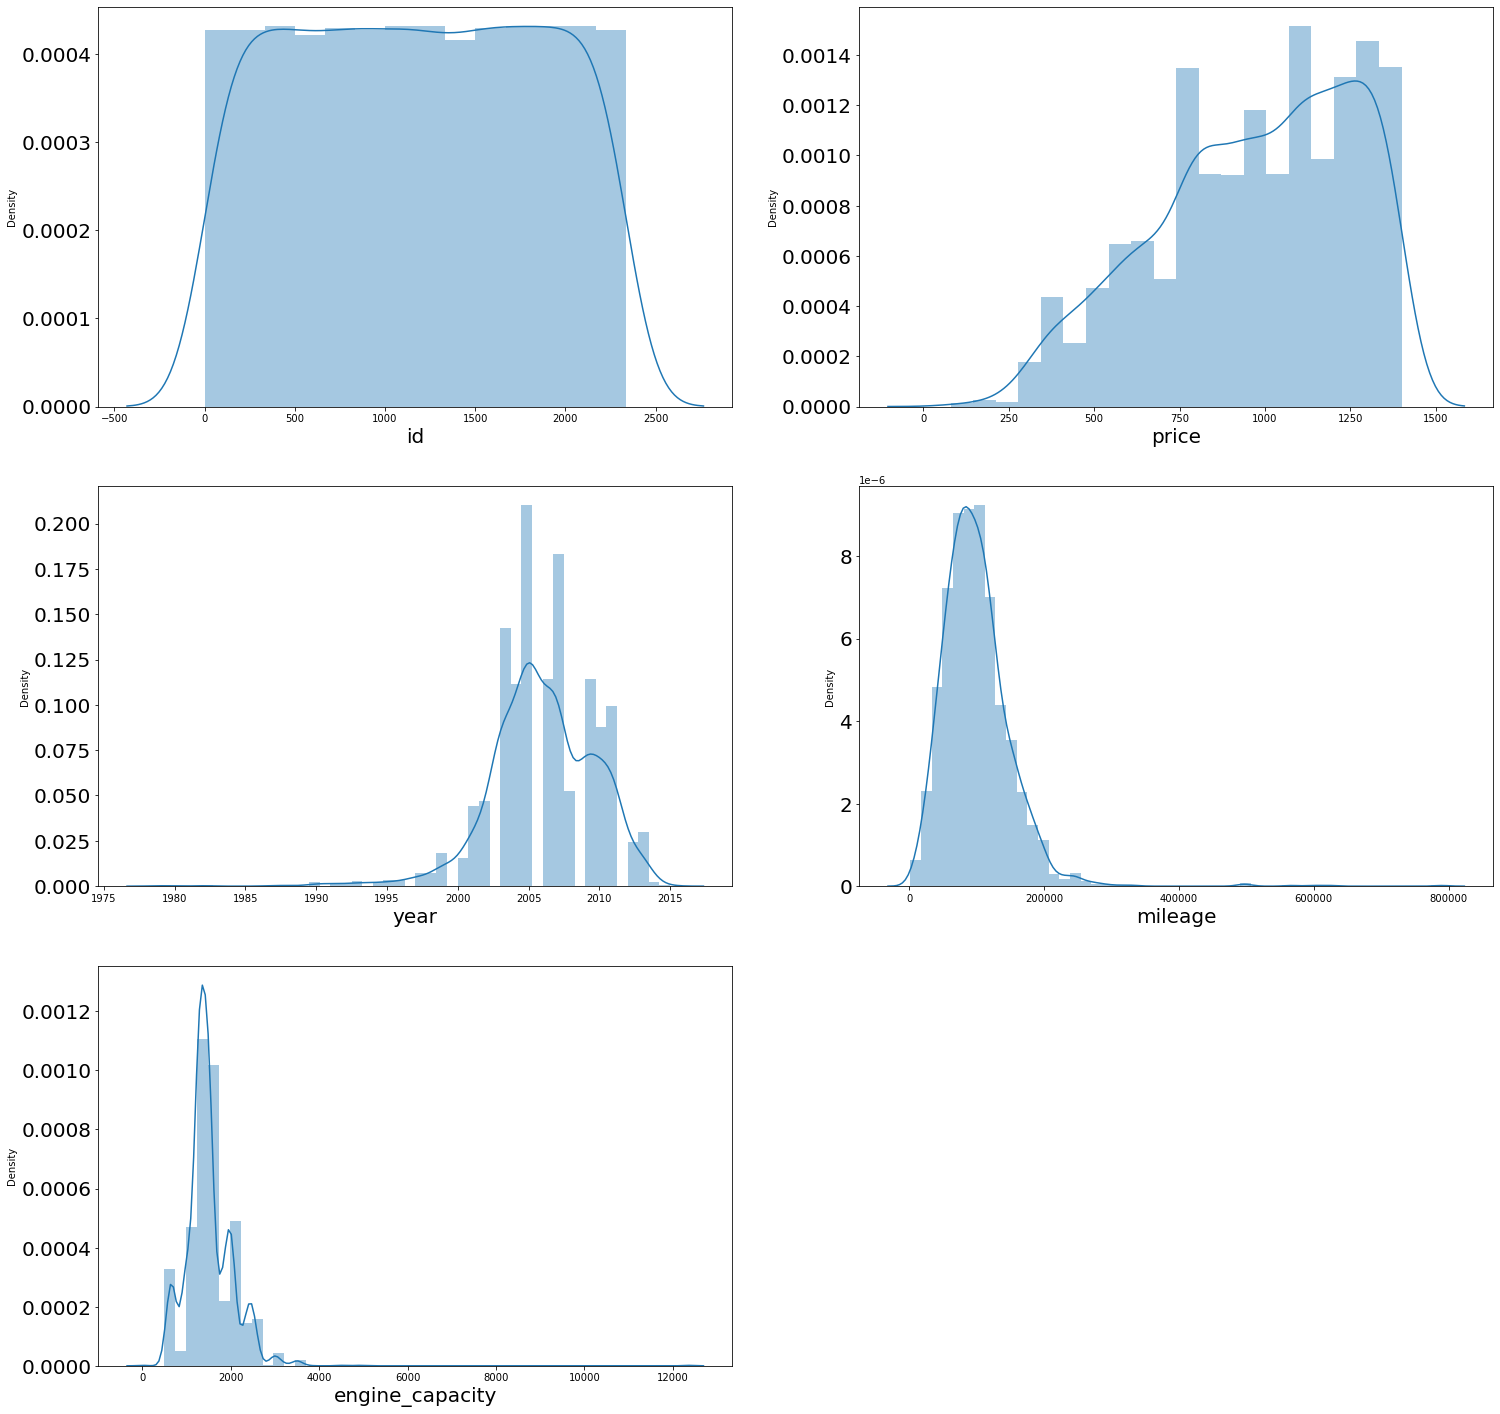

In [46]:
plt.figure(figsize=(25,25))
n=1
for i in cn:
    if (n<7):
        ax=plt.subplot(3,2,n)
        sns.distplot(cn[i])
        plt.xlabel(i,fontsize=20)
        plt.yticks(size=20)
    n+=1
plt.show()

IT CAN BE OBSERVED THAT THERE IS SKEWNESS IN PRICE,YEAR,ENGINE_CAPACITY<BR>
AND OUTLIERS IN YEAR,MILEAGE,ENGINE_CAPACITY<BR>

BOXPLOT FOR THE CONTINUOS FEATURES

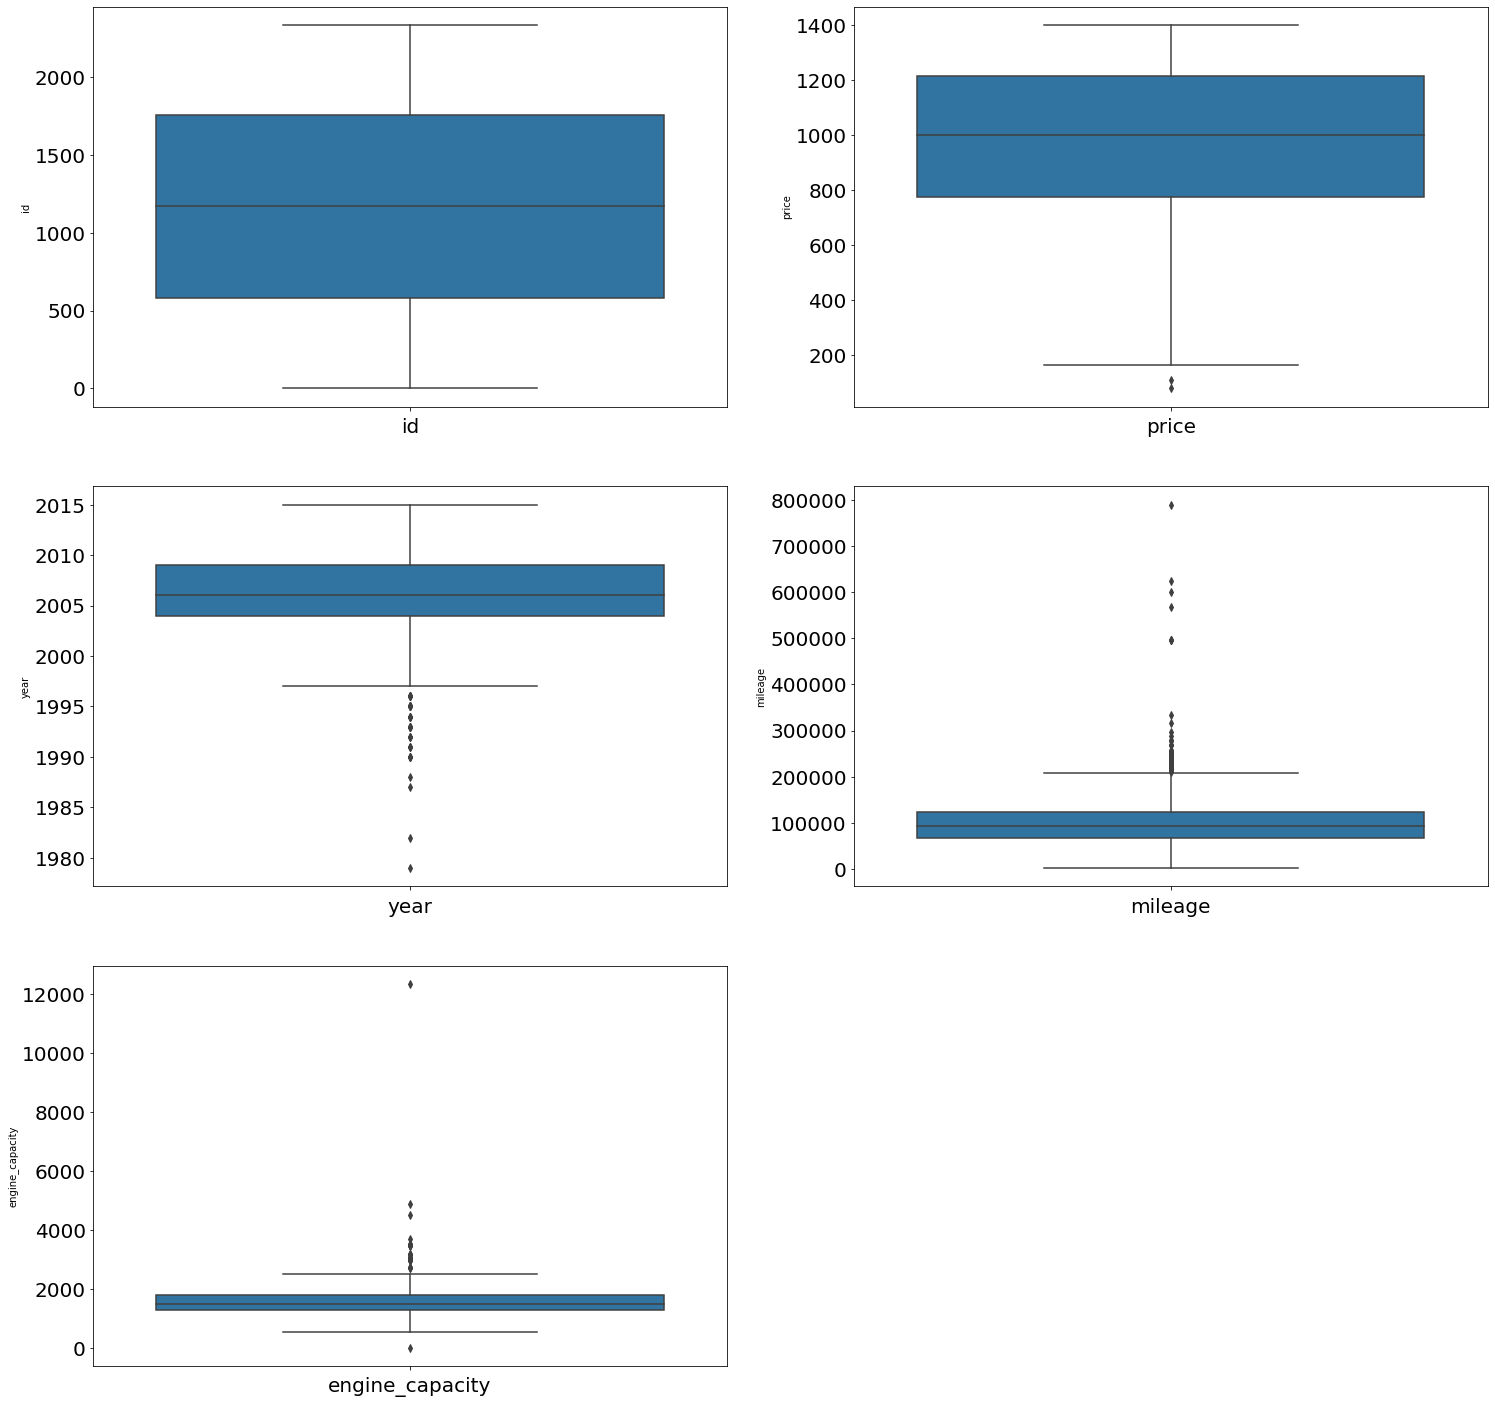

In [47]:
plt.figure(figsize=(25,25))
n=1
for i in cn:
    if (n<7):
        ax=plt.subplot(3,2,n)
        sns.boxplot(y=cn[i])
        plt.xlabel(i,fontsize=20)
        plt.yticks(size=20)
    n+=1
plt.show()

UNCONTROLLED OUTLIERS IN YEAR ,MILEAGE AND ENGINE_CAPACITY

SKEWNESS IN THE FEATURES

year              -0.845917
price             -0.466780
id                -0.002276
mileage            3.089142
engine_capacity    4.038892
dtype: float64


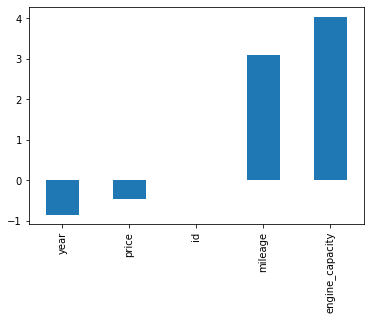

In [48]:
print(df.skew().sort_values())
df.skew().sort_values().plot(kind='bar')
plt.show()

LETS ENCODE THE CATEGORICAL COLUMNS FIRST

In [49]:
inf

,FEATURE,NUMBER OF UNIQUE FEATURES,UNIQUE FEATURES
0,mark,28,"[nissan, toyota, daihatsu, volkswagen, mazda, honda, subaru, mercedes-benz, kubota, mitsubishi, suzuki, bmw, chrysler, smart, gm, opel, isuzu, land rover, peugeot, hyundai, kia motors, audi, citroen, mitsuoka, volvo, ford, hino, jaguar]"
1,model,258,"[march, lafesta, avensis, mira, passat, bongo van, step wgn, sambar, inspire, mercedes-benz others, note, passo, impreza, kubota others, life, progres, cube cubic, cube, a-class, coltplus, mr wagon, pajero mini, fit, legacy b4, vitz, mark ii blit, insight, move, tanto, terios kid, az-wagon, coo, verisa, swift, delica d2, tiida, sienta, mini, colt, platz, bluebird sylphy, eclipse, bb, moco, clipper truck, esse, ek wagon, polo, x-trail, atenza sport, ad van, pixis space, freed spike, stream, alto, raum, wish, every, demio, jimny, premacy, cr-v, lapin, delica, wagon r, lancer, naked, odyssey, ractis, porte, corolla rumion, tiida latio, voxy, carol, sunny, bongo truck, boon, s-mx, pt cruiser, golf, ad expert, fit hybrid, serena, edix, move custom, impreza anesis, estima, carry truck, solio, mpv, vanette van, accord, tribute, pajero io, noah, vanette truck, delica truck, lancer cargo, atenza wagon, atenza, ...]"
2,transmission,3,"[at, mt, cvt]"
3,drive,3,"[2wd, 4wd, awd]"
4,hand_drive,3,"[rhd, center, lhd]"
5,fuel,5,"[gasoline, diesel, hybrid, lpg, cng]"


USING BINARY ENCODER FOR THE NOMINAL DATA

In [50]:
nominal_cols=['mark','model','transmission','drive','hand_drive','fuel']
numerical_cols=['id','price','year','mileage','engine_capacity']

In [51]:
import category_encoders as ce
ben=ce.BinaryEncoder(cols=nominal_cols)


In [52]:
df=ben.fit_transform(df)

In [53]:
df

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,80,0,0,0,0,1,0,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,110,0,0,0,0,1,0,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,165,0,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,190,0,0,0,1,0,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,190,0,0,0,1,1,0,0,0,...,660,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,0,0,0,1,0,0,0,0,...,996,0,1,0,1,0,1,0,0,1
2314,2332,1400,0,0,0,1,0,0,0,1,...,3000,0,1,0,1,0,1,0,0,1
2315,2333,1400,0,0,1,1,1,0,0,1,...,660,1,1,0,1,0,1,0,0,1
2316,2334,1400,0,0,1,1,0,1,0,0,...,660,0,1,1,0,0,1,0,0,1


ALL THE NOMINAL CATEGOTICAL COLUMNS HAVE BEEN BINARY ENCODED 

REMOVING THE OUTLIERS USING DATASIST

SHAPE BEFOREREMOVING THE OUTLIERS

In [54]:
df.shape

(2318, 28)

In [55]:
df_nums=df.copy()

In [56]:
from datasist.structdata import detect_outliers

In [57]:
outliers = detect_outliers(df_nums[numerical_cols],0,df_nums[numerical_cols].columns)

In [58]:
df_nums.drop(outliers,inplace=True)

shape before outliers removal

In [60]:
df_nums.shape

(2197, 28)

LOSS AFTER OUTLIER REMOVAL :

In [61]:
(2318-2197)/2318*100

5.220017256255392

SINCE LOSS IS NOT THAT MUCH WE WILL CONTINUE WITH THE NEW OUTLIER REMOVED DATASET

USING POWER TRANSFOERMER METHOD FOR STANDARDISATION AND DECREASING THE SKEWNESS

In [62]:
df.head()

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,80,0,0,0,0,1,0,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,110,0,0,0,0,1,0,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,165,0,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,190,0,0,0,1,0,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,190,0,0,0,1,1,0,0,0,...,660,0,1,0,1,0,1,0,0,1


In [63]:
from sklearn.preprocessing import PowerTransformer

In [64]:
pt=PowerTransformer(method='yeo-johnson')

In [65]:
df_new=pd.DataFrame(pt.fit_transform(df_nums),columns=df_nums.columns)

In [66]:
df_new

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,-2.164720,-2.273313,-0.105093,-0.329357,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,...,1.177365,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
1,-2.157144,-2.233575,-0.105093,-0.329357,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,...,1.157457,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
2,-2.150105,-2.233575,-0.105093,-0.329357,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,...,-2.115731,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
3,-2.143468,-2.233575,-0.105093,-0.329357,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,...,-2.115731,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
4,-2.125236,-2.182455,-0.105093,-0.329357,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,...,-0.591712,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,1.553778,1.632308,-0.105093,-0.329357,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,...,1.177365,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
2193,1.554919,1.632308,-0.105093,-0.329357,1.544412,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,...,-0.346539,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
2194,1.556061,1.632308,-0.105093,-0.329357,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,...,-1.121974,-0.231769,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307
2195,1.558344,1.632308,-0.105093,-0.329357,1.544412,0.564560,1.532673,-0.030185,-0.372736,1.524386,...,-2.115731,4.314635,0.196903,-0.284958,0.280262,-0.080082,-5.684342e-14,-0.042708,-0.085651,0.088307


SPLITTING THE DATASET INTO X_SCALED(FEATURES) AND Y(LABEL)

In [67]:
x_scaled=df_new.drop(['price'],axis=1)

In [68]:
y=df_new['price']

In [69]:
x_scaled.skew()

id                 -0.282512
mark_0              9.416675
mark_1              2.708708
mark_2              0.897529
mark_3             -1.207557
mark_4              0.880819
model_0            33.120970
model_1             2.311707
model_2             0.868977
model_3             0.325800
model_4            -0.200498
model_5             0.024598
model_6            -0.013665
model_7             0.185718
model_8            -0.563060
year               -0.000962
mileage            -0.027962
engine_capacity     0.007618
transmission_0      4.085655
transmission_1     -4.885083
drive_0             3.226541
drive_1            -3.290072
hand_drive_0       12.415532
hand_drive_1        0.000000
fuel_0             23.388002
fuel_1             11.597563
fuel_2            -11.243473
dtype: float64

CHECKING FOR MULTI COLLINEARITY ISSUE

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif=pd.DataFrame()

In [108]:
num_cols=x_scaled[['id','year','mileage','engine_capacity']]

In [109]:
vif['features']=num_cols.columns

In [110]:
vif['scores']=[variance_inflation_factor(num_cols,i) for i  in range (num_cols.shape[1])]

In [111]:
vif

,features,scores
0,id,1.077843
1,year,1.109075
2,mileage,1.017477
3,engine_capacity,1.084183


SINCE NONE OF THE SCORES ARE GREATER THAN 5% IT CAN BE ASSURED THAT THERE IS NO MULTICOLLINEARITY EXISTING

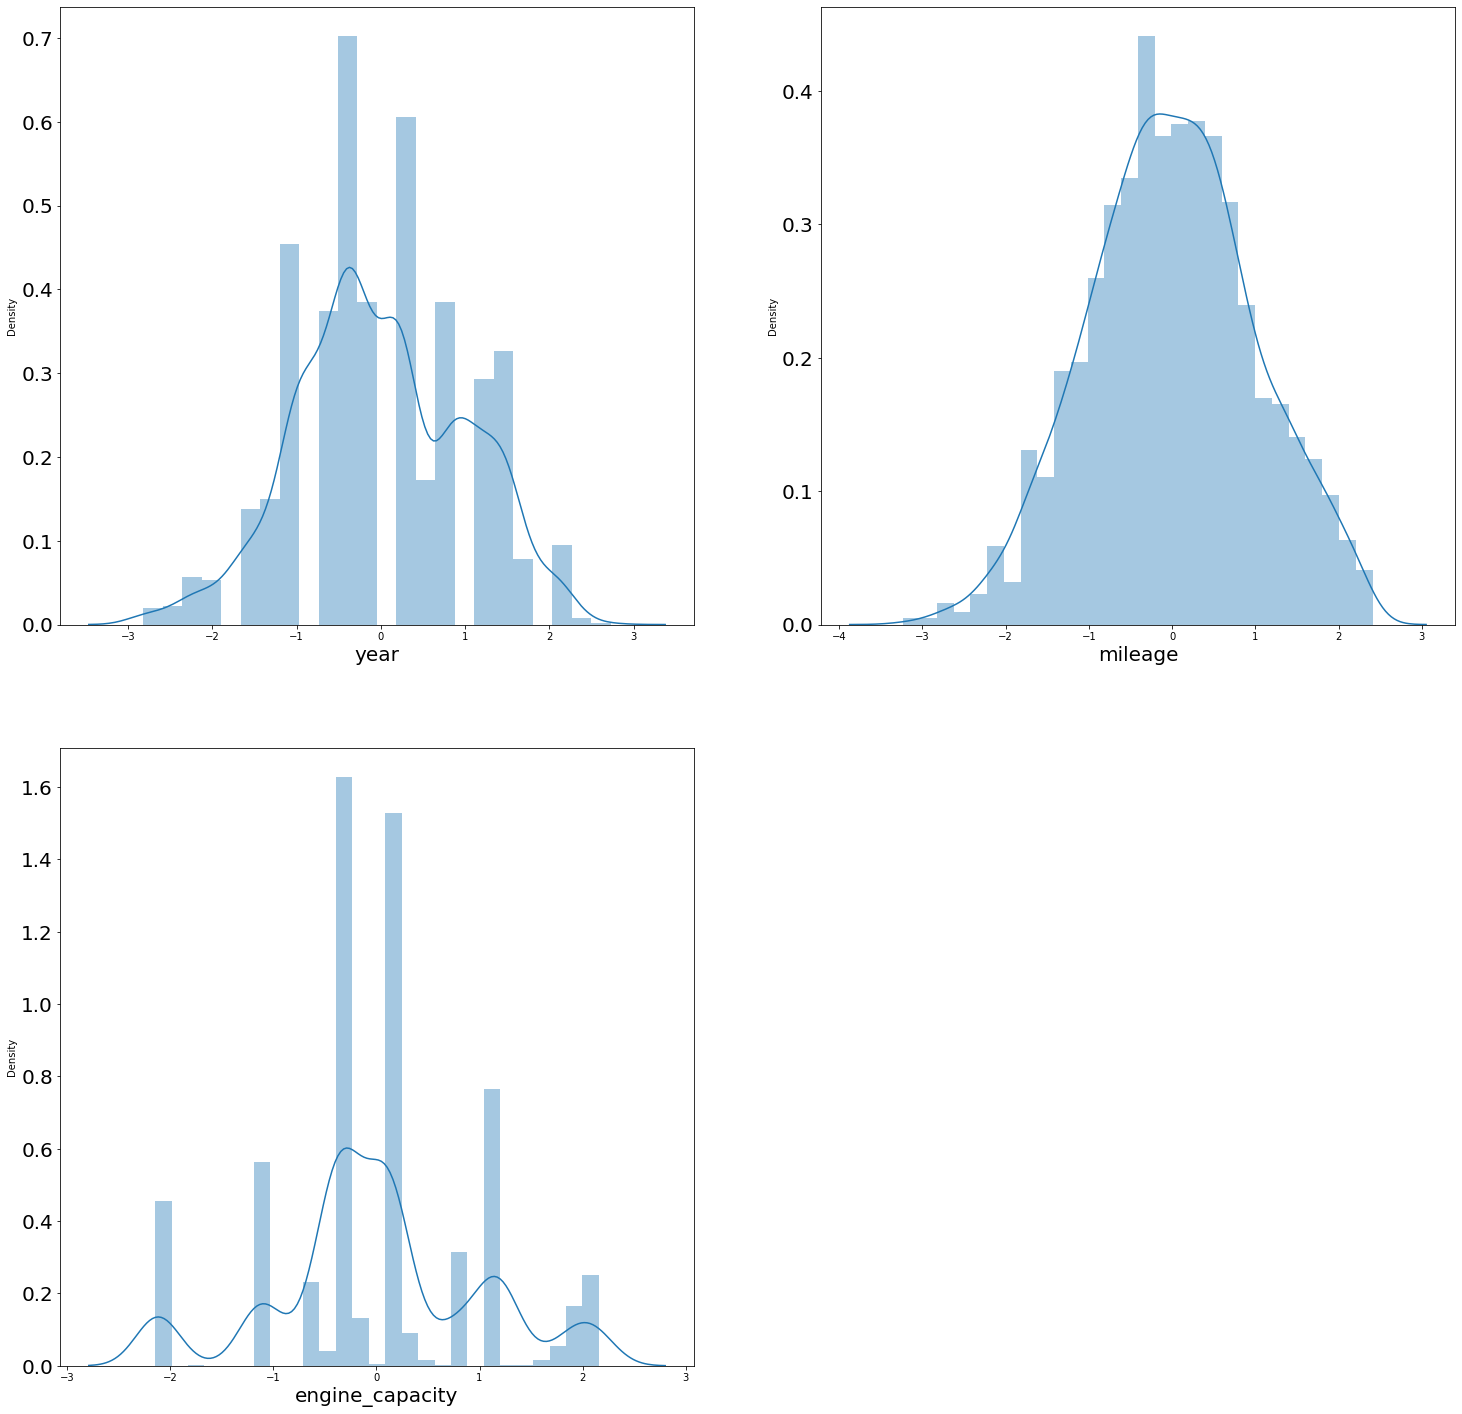

In [76]:
plt.figure(figsize=(25,25))
n=1
for i in x_scaled[['year','mileage','engine_capacity']]:
    if (n<5):
        ax=plt.subplot(2,2,n)
        sns.distplot(x_scaled[i])
        plt.xlabel(i,fontsize=20)
        plt.yticks(size=20)
    n+=1
plt.show()

SKEWNESS REDUCED SUCCESSFULLY<br>
features looks more gaussian after the power transformer

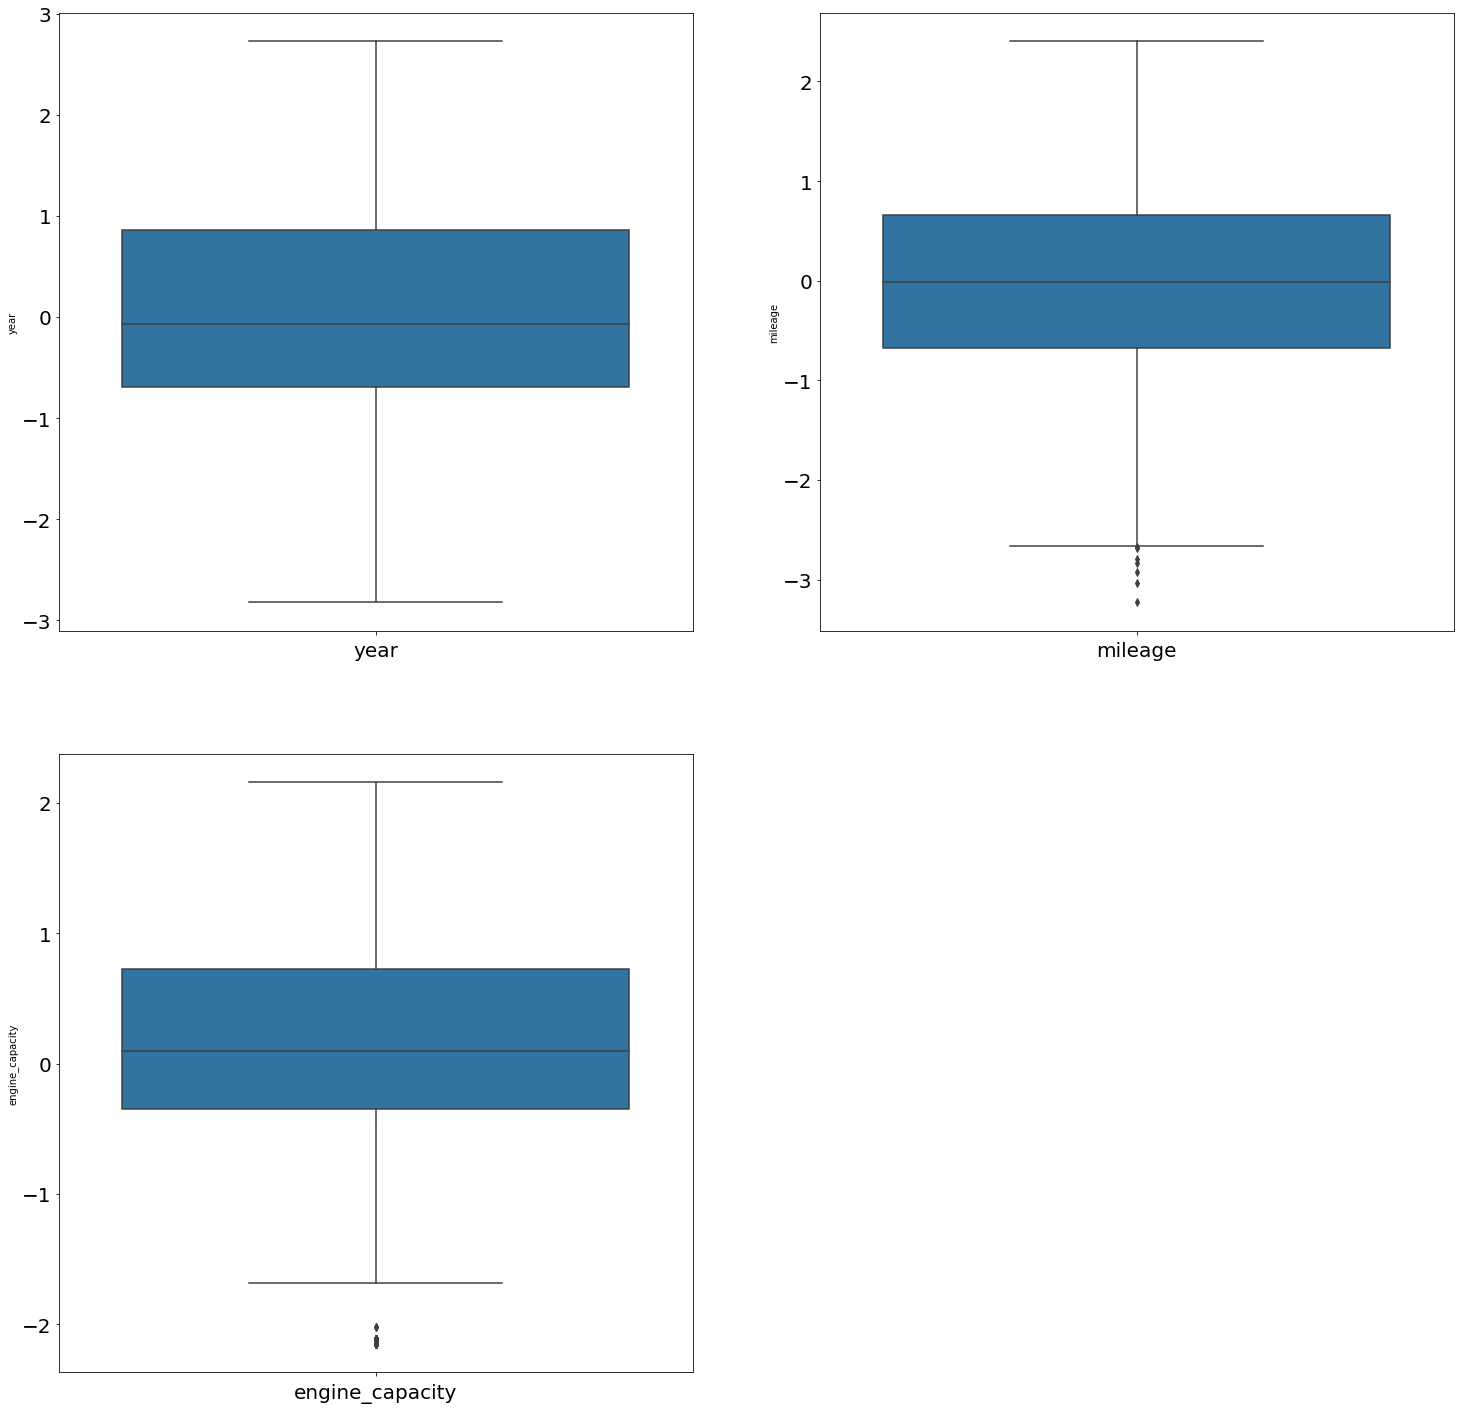

In [77]:
plt.figure(figsize=(25,25))
n=1
for i in x_scaled[['year','mileage','engine_capacity']]:
    if (n<5):
        ax=plt.subplot(2,2,n)
        sns.boxplot(y=x_scaled[i])
        plt.xlabel(i,fontsize=20)
        plt.yticks(size=20)
    n+=1
plt.show()

CONSIDERABLE AMOUNT OF OUTLIERS REMOVAL USING DATASIST.Datastruct<br>
    WITHOUT only 5% LOSS IS DATA SO WE CAN CONTINUE USING THIS

In [78]:
x_scaled.shape

(2197, 27)

SELECTING BEST FEATURES USING SELECTKBEST

In [81]:
from sklearn.feature_selection import SelectKBest,f_classif

In [87]:
select=SelectKBest(score_func=f_classif,k=20)

In [91]:
k=20

In [92]:
fit=select.fit(x_scaled,y)

GETTING THE INDICES OF THE BEST 20 FEATURES AND SAVING IT IN cols LIST

In [93]:
cols=fit.get_support(indices=True)

In [94]:
print(f' top {k} FEATURES INDEX  = {cols}')

 top 20 FEATURES INDEX  = [ 0  1  3  4  5  6  7  8  9 10 11 13 15 16 17 18 19 22 25 26]


GETTING THE FEATURES OF BASED ON THE INDICES AND SAVING THEM AS FEATUERES

In [95]:
features=x_scaled.columns[cols]

In [103]:
list(features)

['id',
 'mark_0',
 'mark_2',
 'mark_3',
 'mark_4',
 'model_0',
 'model_1',
 'model_2',
 'model_3',
 'model_4',
 'model_5',
 'model_7',
 'year',
 'mileage',
 'engine_capacity',
 'transmission_0',
 'transmission_1',
 'hand_drive_0',
 'fuel_1',
 'fuel_2']

In [96]:
print(f' BEST {len(cols)} FEATURES ARE AS FOLLOWS :  \n\n{list(features)} ')

 BEST 20 FEATURES ARE AS FOLLOWS :  

['id', 'mark_0', 'mark_2', 'mark_3', 'mark_4', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_7', 'year', 'mileage', 'engine_capacity', 'transmission_0', 'transmission_1', 'hand_drive_0', 'fuel_1', 'fuel_2'] 


In [105]:
features_scores=pd.DataFrame()

features_scores['FEATURES']=x_scaled.columns
features_scores['SCORES']=fit.scores_

In [113]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)

TOP 20 FEATURES AND SCORES ARE AS FOLLOWS

In [114]:
features_scores[:21]

,FEATURES,SCORES
0,id,34364.938214
22,hand_drive_0,7.936763
1,mark_0,3.850728
25,fuel_1,3.715448
26,fuel_2,3.326245
6,model_0,2.080297
19,transmission_1,2.060629
3,mark_2,2.045690
15,year,1.994485
18,transmission_0,1.941183


In [115]:
x_scaled=x_scaled[features]

In [116]:
x_scaled.head()

,id,mark_0,mark_2,mark_3,mark_4,model_0,model_1,model_2,model_3,model_4,model_5,model_7,year,mileage,engine_capacity,transmission_0,transmission_1,hand_drive_0,fuel_1,fuel_2
0,-2.164720,-0.105093,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,1.097092,-0.380263,-1.224634,1.177365,-0.231769,0.196903,-0.080082,-0.085651,0.088307
1,-2.157144,-0.105093,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,1.097092,0.546553,0.870831,1.157457,-0.231769,0.196903,-0.080082,-0.085651,0.088307
2,-2.150105,-0.105093,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,-0.911501,-0.071975,-0.682013,-2.115731,-0.231769,0.196903,-0.080082,-0.085651,0.088307
3,-2.143468,-0.105093,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,-0.911501,-0.687903,-0.281349,-2.115731,-0.231769,0.196903,-0.080082,-0.085651,0.088307
4,-2.125236,-0.105093,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,-0.911501,1.167687,0.569888,-0.591712,-0.231769,0.196903,-0.080082,-0.085651,0.088307


In [118]:
x_scaled.shape

(2197, 20)

IMPORTING NECESSARY  LIBRARIES

In [119]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [120]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 0


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 1


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 2


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 3


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 4


TRAINING ACCURACY IS -99.8--AND TESTING ACCURACY IS 99.82


AT RANDOM STATE-- 5


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.79


AT RANDOM STATE-- 6


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.79


AT RANDOM STATE-- 7


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 8


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 9


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 10


TRAINING ACCURACY IS -99.8--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 11


TRAINING ACCURACY IS -99.81--AND TESTING ACCURACY IS 99.8


AT RAND

SELECTING RANDOM STATE AS 506

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=506)

In [122]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")
    



CROSS VAL IS AT CV = 2 is 92.96


CROSS VAL IS AT CV = 3 is 90.27


CROSS VAL IS AT CV = 4 is 90.29


CROSS VAL IS AT CV = 5 is 88.07


CROSS VAL IS AT CV = 6 is 85.1


CROSS VAL IS AT CV = 7 is 84.37


CROSS VAL IS AT CV = 8 is 82.62


CROSS VAL IS AT CV = 9 is 77.71


taking cv=4 as it gives optimal value for cross val scores

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=6
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=4).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [126]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 99.81

mean sqaured error is -- 0.001935748971962242

mean sqaured error is -- 0.001935748971962242

root mean sqaured error is -- 0.043997147316186785

mean aboslute error is -- 0.0367519511273391

difference between rmse and mae is  0.007245196188847683


Testing SCORE FOR THE LinearRegression() is 99.81


CROSS VAL SCORE IS -- 90.29

adjusted r2_score for LinearRegression() is 99.81

mean sqaured error is -- 0.0019094495245977206

mean aboslute error is - 0.03551327755891482

root mean sqaured error is -- 0.04369724847856808

mean aboslute error is -- 0.03551327755891482

difference between rmse and mae is  0.008183970919653262


VERY HIGH VALUES OF BOTH TRAINING AND TESTING ACCURACIES AND ROOT MEAN SQUARE ERROR IS ALSO VERY LOW

CHECKING IF OUR LINEAR REGRESSION MODEL OVERFIT USING LASSO<br>


LASSO LINEAR REGRESSION
------------------------------

In [136]:
from sklearn.linear_model import Lasso,LassoCV

In [137]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)

In [138]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [139]:
alpha=lasscv.alpha_

In [140]:
lass_reg=Lasso(alpha)

In [141]:
lass_reg.fit(x_train,y_train)

Lasso(alpha=2.4559962982142422e-05)

In [143]:
print(f'TRAINING R2_SCORES USING LASSO IS {round(lass_reg.score(x_train,y_train)*100,2)}')


TRAINING SCORES USING LASSO IS 99.81


In [144]:
print(f'TESTING R2_SCORES USING LASSO IS {round(lass_reg.score(x_test,y_test)*100,2)}')

TESTING R2_SCORES USING LASSO IS 99.81


SINCE USING LASSO GIVES THE SAME VALUE AS WE WERE GETTING FOR Linear Regression clearly states that our model is not overfitting/underfiiting  and can be considered a good model

MODEL 2)-DECISION TREE
----------------------

In [127]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
dt=DecisionTreeRegressor()

In [129]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 2.887110186418364e-32

mean sqaured error is -- 2.887110186418364e-32

root mean sqaured error is -- 1.6991498422500483e-16

mean aboslute error is -- 7.956766865160408e-17

difference between rmse and mae is  9.034731557340075e-17


Testing SCORE FOR THE DecisionTreeRegressor() is 100.0


CROSS VAL SCORE IS -- -132.27

adjusted r2_score for DecisionTreeRegressor() is 100.0

mean sqaured error is -- 3.8900961155185766e-05

mean aboslute error is - 0.0022389260409467018

root mean sqaured error is -- 0.006237063504180935

mean aboslute error is -- 0.0022389260409467018

difference between rmse and mae is  0.003998137463234233


In [130]:
from sklearn.model_selection import GridSearchCV

#### HYPERPARAMETER TUNING THE PARAMETERS:

In [131]:
dt=DecisionTreeRegressor()

In [132]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(3,6),
    'random_state':[404,350,234,210,198],
    'max_depth':np.arange(28,32)}

In [133]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [134]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([28, 29, 30, 31]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [145]:
lgt.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 28,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 234,
 'splitter': 'best'}

In [146]:
dt=lgt.best_estimator_

In [147]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=28,
                      min_samples_leaf=3, random_state=234)

In [148]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(criterion='friedman_mse', max_depth=28,
                      min_samples_leaf=3, random_state=234) is 100.0

mean sqaured error is -- 9.827739726017949e-06

mean sqaured error is -- 9.827739726017949e-06

root mean sqaured error is -- 0.0031349226028752207

mean aboslute error is -- 0.001012877973084702

difference between rmse and mae is  0.002122044629790519


Testing SCORE FOR THE DecisionTreeRegressor(criterion='friedman_mse', max_depth=28,
                      min_samples_leaf=3, random_state=234) is 100.0


CROSS VAL SCORE IS -- -134.93

adjusted r2_score for DecisionTreeRegressor(criterion='friedman_mse', max_depth=28,
                      min_samples_leaf=3, random_state=234) is 100.0

mean sqaured error is -- 4.7160982692535475e-05

mean aboslute error is - 0.0028215231310781785

root mean sqaured error is -- 0.006867385433520932

mean aboslute error is -- 0.0028215231310781785

difference between rmse and mae is  0.00404586230

AS TRAINING ,TESTING R_SCORES AND ADJUSTED SCORES ARE 100% AND ROOT MEAN SQUARED ERROR IS ALSO VERY VERY LOW {0.006} this can be consiered as one of the best model

MODEL 3) KNN 
---------------------------------

In [149]:
from sklearn.neighbors import KNeighborsRegressor

In [150]:
knr=KNeighborsRegressor()

In [151]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [152]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 88.73

mean sqaured error is -- 0.11214730363607571

mean sqaured error is -- 0.11214730363607571

root mean sqaured error is -- 0.3348840151994056

mean aboslute error is -- 0.23510001990284932

difference between rmse and mae is  0.09978399529655627


Testing SCORE FOR THE KNeighborsRegressor() is 84.6


CROSS VAL SCORE IS -- -717.1

adjusted r2_score for KNeighborsRegressor() is 84.54

mean sqaured error is -- 0.15604701789579942

mean aboslute error is - 0.2819755813014079

root mean sqaured error is -- 0.39502786977098137

mean aboslute error is -- 0.2819755813014079

difference between rmse and mae is  0.11305228846957349


HYPERPARAMETER TUNING THE PARAMETERS:

In [153]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [154]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}

In [155]:
kgs=GridSearchCV(knr,param_grid=pl)

In [156]:
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [157]:
kgs.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 25,
 'n_neighbors': 5,
 'weights': 'distance'}

In [158]:
knr=kgs.best_estimator_

In [159]:
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=25, weights='distance')

In [160]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(algorithm='ball_tree', leaf_size=25, weights='distance') is 100.0

mean sqaured error is -- 0.0

mean sqaured error is -- 0.0

root mean sqaured error is -- 0.0

mean aboslute error is -- 0.0

difference between rmse and mae is  0.0


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(algorithm='ball_tree', leaf_size=25, weights='distance') is 87.19


CROSS VAL SCORE IS -- -679.95

adjusted r2_score for KNeighborsRegressor(algorithm='ball_tree', leaf_size=25, weights='distance') is 87.15

mean sqaured error is -- 0.12973553666395007

mean aboslute error is - 0.25039891776186646

root mean sqaured error is -- 0.3601881961752079

mean aboslute error is -- 0.25039891776186646

difference between rmse and mae is  0.10978927841334146


AGAIN TUNING THE PARAMETERS------------------------

In [161]:
knr=KNeighborsRegressor()

In [162]:
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(40,50)}

In [163]:
kgsv=GridSearchCV(knr,param_grid=pu)

In [164]:
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [165]:
kgsv.best_params_

{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 4, 'weights': 'distance'}

In [166]:
knr=kgsv.best_estimator_

In [167]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance')

In [168]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 100.0

mean sqaured error is -- 2.6666947369810738e-15

mean sqaured error is -- 2.6666947369810738e-15

root mean sqaured error is -- 5.1640049738367544e-08

mean aboslute error is -- 2.123496153477956e-08

difference between rmse and mae is  3.0405088203587984e-08


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 86.8


CROSS VAL SCORE IS -- -671.88

adjusted r2_score for KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 86.75

mean sqaured error is -- 0.13375276443090614

mean aboslute error is - 0.24742429857560083

root mean sqaured error is -- 0.36572225039079337

mean aboslute error is -- 0.24742429857560083

difference between rmse and mae is  0.11829795181519254


MODEL 4)-RANDOM FOREST REGRESSOR
------------------

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
rfr=RandomForestRegressor()

In [171]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [172]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 100.0

mean sqaured error is -- 4.350813156903569e-06

mean sqaured error is -- 4.350813156903569e-06

root mean sqaured error is -- 0.0020858602917989424

mean aboslute error is -- 0.00074278832745513

difference between rmse and mae is  0.0013430719643438122


Testing SCORE FOR THE RandomForestRegressor() is 100.0


CROSS VAL SCORE IS -- -134.03

adjusted r2_score for RandomForestRegressor() is 100.0

mean sqaured error is -- 1.9879767135266058e-05

mean aboslute error is - 0.002095838892832273

root mean sqaured error is -- 0.004458673248317941

mean aboslute error is -- 0.002095838892832273

difference between rmse and mae is  0.0023628343554856677


HYPERPARAMETER TUNING

In [173]:
rfr=RandomForestRegressor()

In [174]:
par={"n_estimators":[60,72,82],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30],
     "min_samples_split":[2,3,5]}

In [175]:
rgs=GridSearchCV(rfr,param_grid=par)

In [176]:
rgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 72, 82]})

In [177]:
rgs.best_params_

{'criterion': 'squared_error',
 'max_depth': 25,
 'min_samples_split': 5,
 'n_estimators': 72}

In [178]:
rfr=rgs.best_estimator_

In [179]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=72) is 100.0

mean sqaured error is -- 5.24107427429182e-06

mean sqaured error is -- 5.24107427429182e-06

root mean sqaured error is -- 0.0022893392658782184

mean aboslute error is -- 0.0008337449066664803

difference between rmse and mae is  0.0014555943592117382


Testing SCORE FOR THE RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=72) is 100.0


CROSS VAL SCORE IS -- -134.6

adjusted r2_score for RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=72) is 100.0

mean sqaured error is -- 2.083657521344649e-05

mean aboslute error is - 0.0020888454149787694

root mean sqaured error is -- 0.004564709762235326

mean aboslute error is -- 0.0020888454149787694

difference between rmse and mae is  0.0024758643472565568


MODEL 5)  SVR
-----------------------

In [180]:
from sklearn.svm import SVR

In [181]:
svr=SVR()

In [182]:
svr.fit(x_train,y_train)

SVR()

In [183]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 99.4

mean sqaured error is -- 0.005943931567099557

mean sqaured error is -- 0.005943931567099557

root mean sqaured error is -- 0.07709689725987394

mean aboslute error is -- 0.06159098700789463

difference between rmse and mae is  0.01550591025197931


Testing SCORE FOR THE SVR() is 99.07


CROSS VAL SCORE IS -- -26.25

adjusted r2_score for SVR() is 99.07

mean sqaured error is -- 0.009372235897369179

mean aboslute error is - 0.0708668109493589

root mean sqaured error is -- 0.09681030883831111

mean aboslute error is -- 0.0708668109493589

difference between rmse and mae is  0.025943497888952213


HYPERPARAMETER TUNING

In [184]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}

In [185]:
sgs=GridSearchCV(svr,param_grid=parm)

In [186]:
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [187]:
sgs.best_params_

{'epsilon': 0.1, 'gamma': 'scale', 'shrinking': False}

In [188]:
svr=sgs.best_estimator_

In [189]:
svr.fit(x_train,y_train)

SVR(shrinking=False)

In [190]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(shrinking=False) is 99.4

mean sqaured error is -- 0.00594471917607908

mean sqaured error is -- 0.00594471917607908

root mean sqaured error is -- 0.07710200500686788

mean aboslute error is -- 0.061597254957766634

difference between rmse and mae is  0.015504750049101249


Testing SCORE FOR THE SVR(shrinking=False) is 99.07


CROSS VAL SCORE IS -- -26.23

adjusted r2_score for SVR(shrinking=False) is 99.07

mean sqaured error is -- 0.009373812258369764

mean aboslute error is - 0.07088028865001814

root mean sqaured error is -- 0.09681844998950233

mean aboslute error is -- 0.07088028865001814

difference between rmse and mae is  0.025938161339484192


MODEL 6)  ADA BOOST REGRESSOR
-----------------------

In [191]:
from sklearn.ensemble import AdaBoostRegressor

In [192]:
adr=AdaBoostRegressor()

In [193]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [194]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 99.64

mean sqaured error is -- 0.0035436794321132992

mean sqaured error is -- 0.0035436794321132992

root mean sqaured error is -- 0.05952881178146679

mean aboslute error is -- 0.04266122108716245

difference between rmse and mae is  0.016867590694304338


Testing SCORE FOR THE AdaBoostRegressor() is 99.45


CROSS VAL SCORE IS -- -269.88

adjusted r2_score for AdaBoostRegressor() is 99.45

mean sqaured error is -- 0.005548688875922501

mean aboslute error is - 0.05779539363039554

root mean sqaured error is -- 0.07448952192035133

mean aboslute error is -- 0.05779539363039554

difference between rmse and mae is  0.016694128289955784


HYPERPARAMETER TUNING----------------

In [195]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [196]:
para={
     'n_estimators':[48,52,60,72],
     'learning_rate':[0.001,0.025,0.03],
     'random_state':[232,345,678]}


In [197]:
ags=GridSearchCV(adr,param_grid=para)


In [198]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03],
                         'n_estimators': [48, 52, 60, 72],
                         'random_state': [232, 345, 678]})

In [199]:
ags.best_params_

{'learning_rate': 0.03, 'n_estimators': 72, 'random_state': 678}

In [200]:
adr=ags.best_estimator_

In [201]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=678) is 98.52

mean sqaured error is -- 0.014775618061316513

mean sqaured error is -- 0.014775618061316513

root mean sqaured error is -- 0.12155500014938304

mean aboslute error is -- 0.10408979355242715

difference between rmse and mae is  0.0174652065969559


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=678) is 98.5


CROSS VAL SCORE IS -- -299.09

adjusted r2_score for AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=678) is 98.5

mean sqaured error is -- 0.015148277655639671

mean aboslute error is - 0.10420569011871353

root mean sqaured error is -- 0.12307833950634722

mean aboslute error is -- 0.10420569011871353

difference between rmse and mae is  0.018872649387633694


CONCLUSION
----------------------

SINCE ***LINEAR REGRESSION*** GAVE QUIET CLOSE VALUES FOR BOTH TRAINING AND TESTING <BR>
CROSS VAL SCORE ,ADJSUTED R2 SCORE AND TESTING SCORES WERE CLOSER TO EACH OTHER WE WILL PREFER THIS MODEL<BR>
DIFFERENCE BETWEEN RSME AND MAE IS LOW TOO (0.04) WHICH DEPICTS A LOW VARIANCE<BR>
    AND THE MODEL WAS NOT OVER FITTING AS ANALYSED USING LASSO <BR>

FINAL MODEL

In [202]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 99.81

mean sqaured error is -- 0.001935748971962242

mean sqaured error is -- 0.001935748971962242

root mean sqaured error is -- 0.043997147316186785

mean aboslute error is -- 0.0367519511273391

difference between rmse and mae is  0.007245196188847683


Testing SCORE FOR THE LinearRegression() is 99.81


CROSS VAL SCORE IS -- 90.29

adjusted r2_score for LinearRegression() is 99.81

mean sqaured error is -- 0.0019094495245977206

mean aboslute error is - 0.03551327755891482

root mean sqaured error is -- 0.04369724847856808

mean aboslute error is -- 0.03551327755891482

difference between rmse and mae is  0.008183970919653262


SAVING THE MODEL-
----------------------

In [204]:
import pickle

In [205]:
with open('linear_model_pkl', 'wb') as files:
    pickle.dump(lr, files)